In [21]:
import scipy.io as sio
import numpy as np

from mne.filter import filter_data, resample

PRE_EVENT_DURATION = 1 # The amount of time (in seconds) to include before the stimulus
POST_EVENT_DURATION = 1 # The amount of time (in seconds) to include after the stimulus
EVENT_DURATION = 3

CHANNELS = [
    "FP1",
    "AF7",
    "AF3",
    "F1",
    "F3",
    "F5",
    "F7",
    "FT7",
    "FC5",
    "FC3",
    "FC1",
    "C1",
    "C3",
    "C5",
    "T7",
    "TP7",
    "CP5",
    "CP3",
    "CP1",
    "P1",
    "P3",
    "P5",
    "P7",
    "P9",
    "PO7",
    "PO3",
    "O1",
    "IZ",
    "OZ",
    "POZ",
    "PZ",
    "CPZ",
    "FPZ",
    "FP2",
    "AF8",
    "AF4",
    "AFZ",
    "FZ",
    "F2",
    "F4",
    "F6",
    "F8",
    "FT8",
    "FC6",
    "FC4",
    "FC2",
    "FCZ",
    "CZ",
    "C2",
    "C4",
    "C6",
    "T8",
    "TP8",
    "CP6",
    "CP4",
    "CP2",
    "P2",
    "P4",
    "P6",
    "P8",
    "P10",
    "PO8",
    "PO4",
    "O2",
]

In [6]:
sio.loadmat(r"E:\s222165064\motor_imagery\raw\s01.mat")["eeg"]["imagery_event"]

array([[array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]], dtype=object)

In [25]:
raw_mat = sio.loadmat(r"E:\s222165064\motor_imagery\raw\s01.mat",simplify_cells=True)["eeg"]

sample_rate = raw_mat["srate"]
window_before_event_frames = int(PRE_EVENT_DURATION*sample_rate)
window_after_event_frames = int(POST_EVENT_DURATION*sample_rate)
event_window_frames = int(EVENT_DURATION*sample_rate)

total_window_size = PRE_EVENT_DURATION + EVENT_DURATION + POST_EVENT_DURATION

event_onsets = raw_mat["imagery_event"].nonzero()[0]

# Initialize an array to store the samples
left_samples = []
right_samples = []

# Iterate over each event index
for idx in event_onsets:
    # Calculate the start and end indices for the sample
    start_idx = idx - window_before_event_frames
    end_idx = idx + event_window_frames + window_after_event_frames
    
    # Ensure the indices are within bounds
    start_idx = max(0, start_idx)
    end_idx = min(len(raw_mat["imagery_event"]), end_idx)
    
    # Extract the sample from the data arrays
    left_sample = raw_mat["imagery_left"][[0,1], start_idx:end_idx]
    right_sample = raw_mat["imagery_right"][[0,1], start_idx:end_idx]
    
    # Add the sample to the list of samples
    left_samples.append(left_sample)
    right_samples.append(right_sample)

# Convert the list of samples to a numpy array
imagery_left = np.array(left_samples)
imagery_right = np.array(right_samples)

x = np.concatenate((imagery_left, imagery_right), axis=0)
y = np.concatenate((np.zeros(imagery_left.shape[0]), np.ones(imagery_right.shape[0])))

x_filtered = filter_data(x.astype(np.float64), sample_rate, 3, 40, phase='zero', verbose=False)
# down sample to 100Hz
x_filtered_resampled = resample(x_filtered, down=sample_rate/100)

In [24]:
sample_rate

512

In [26]:
print(x_filtered.shape)
print(x_filtered_resampled.shape)

(200, 2, 2560)
(200, 2, 500)


In [15]:
x.shape

(200, 2, 2560)

In [18]:
x_filtered= filter_data(x.astype(np.float64), sample_rate, 3, 40, phase='zero', verbose=False)

In [121]:
print(raw_mat['imagery_left'].shape)
print(raw_mat['imagery_right'].shape)
print(raw_mat['imagery_event'])
print(raw_mat["frame"])
print(raw_mat["srate"])

print(raw_mat["n_imagery_trials"])
print(np.count_nonzero(raw_mat['imagery_event']))

print(raw_mat["imagery_event"].nonzero()[0].shape)
print(np.where(raw_mat["imagery_event"])[0].shape)

(68, 358400)
(68, 358400)
[0 0 0 ... 0 0 0]
[-2000  5000]
512
100
100
(100,)
(100,)


In [3]:
sleep_edf_sample = np.load(r"E:\s222165064\sleep_edf\prepared\fpz_cz\SC4001E0.npz")
motor_imagery_sample = np.load(r"E:\s222165064\motor_imagery\prepared\s01.npz")

In [27]:
del motor_imagery_sample

In [4]:
print(motor_imagery_sample["x"].shape)
print(motor_imagery_sample["y"].shape)

print(sleep_edf_sample["x"].shape)

(200, 2, 2560)
(200,)
(841, 3000, 1)


In [183]:
raw_mat["imagery_left"][0][:100]

array([-28069.746, -28114.746, -28026.996, -28049.246, -28020.746,
       -27885.246, -27544.246, -27328.746, -26971.246, -26957.746,
       -27101.996, -27138.746, -27088.496, -27274.246, -27690.996,
       -27373.496, -27023.246, -26472.246, -25747.496, -25288.746,
       -25347.996, -26074.996, -26531.746, -26157.496, -26026.496,
       -25899.996, -25701.496, -25473.246, -25066.746, -24593.496,
       -24530.246, -24894.996, -25010.496, -25228.746, -25296.746,
       -25215.996, -25351.996, -26112.746, -26177.246, -25796.496,
       -25481.996, -25723.996, -25642.746, -25710.746, -25886.496,
       -26055.746, -25980.996, -26291.996, -26512.246, -26361.996,
       -26446.746, -26815.746, -27433.996, -28244.996, -28248.746,
       -28031.996, -27862.246, -27619.746, -27424.496, -27362.746,
       -27539.496, -27493.996, -27423.246, -27611.246, -27765.746,
       -28228.996, -28286.996, -28215.996, -28069.496, -28161.996,
       -28501.996, -28537.996, -28648.996, -28225.246, -28288.

In [14]:
# print(sleep_edf_sample["x"][0,:50,0])
# print(motor_imagery_sample["x"][0,0,:50])

print(np.max(sleep_edf_sample["x"]))
print(np.max(motor_imagery_sample["x"]))

0.017061979
0.303414


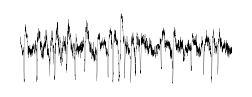

In [17]:
import matplotlib.pyplot as plt
plt.plot(np.arange(3000), sleep_edf_sample["x"][0], color='black', linewidth=0.15)
plt.gca().set_axis_off()
plt.gcf().set_size_inches(3,1)

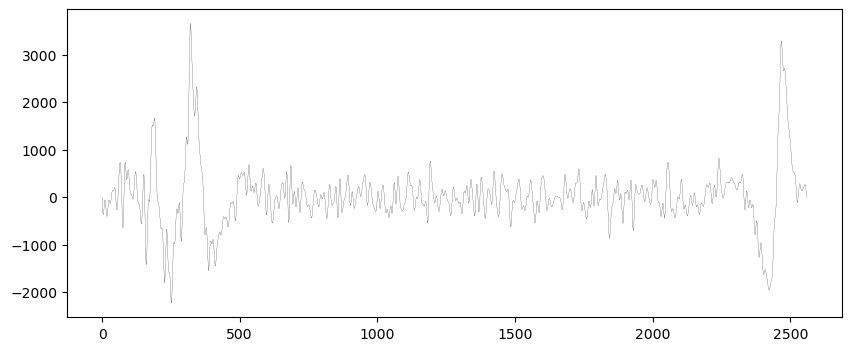

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.arange(2560), x_filtered[0][0], color='black', linewidth=0.15)
#plt.plot(np.arange(2560), motor_imagery_sample["x"][9][1], color='blue', linewidth=0.15)
#plt.gca().set_axis_off()
plt.gcf().set_size_inches(10,4)

In [ ]:
# -*- coding: utf-8 -*-
#
# Authors: Swolf <swolfforever@gmail.com>
# Date: 2021/02/22
# License: MIT License
"""
GigaDb Motor imagery dataset.
"""
from typing import Union, Optional, Dict, List, cast
from pathlib import Path

import numpy as np
from mne import create_info
from mne.io import Raw, RawArray
from mne.channels import make_standard_montage
from .base import BaseDataset
from ..utils.download import mne_data_path
from ..utils.channels import upper_ch_names
from ..utils.io import loadmat

GIGA_URL = "ftp://penguin.genomics.cn/pub/10.5524/100001_101000/100295/mat_data/"

EVENTS = {
    "left_hand": (1, (0, 3)),
    "right_hand": (2, (0, 3)),
}

CHANNELS = [
    "FP1",
    "AF7",
    "AF3",
    "F1",
    "F3",
    "F5",
    "F7",
    "FT7",
    "FC5",
    "FC3",
    "FC1",
    "C1",
    "C3",
    "C5",
    "T7",
    "TP7",
    "CP5",
    "CP3",
    "CP1",
    "P1",
    "P3",
    "P5",
    "P7",
    "P9",
    "PO7",
    "PO3",
    "O1",
    "IZ",
    "OZ",
    "POZ",
    "PZ",
    "CPZ",
    "FPZ",
    "FP2",
    "AF8",
    "AF4",
    "AFZ",
    "FZ",
    "F2",
    "F4",
    "F6",
    "F8",
    "FT8",
    "FC6",
    "FC4",
    "FC2",
    "FCZ",
    "CZ",
    "C2",
    "C4",
    "C6",
    "T8",
    "TP8",
    "CP6",
    "CP4",
    "CP2",
    "P2",
    "P4",
    "P6",
    "P8",
    "P10",
    "PO8",
    "PO4",
    "O2",
]

    def data_path(
        self,
        subject: Union[str, int],
        path: Optional[Union[str, Path]] = None,
        force_update: bool = False,
        update_path: Optional[bool] = None,
        proxies: Optional[Dict[str, str]] = None,
        verbose: Optional[Union[bool, str, int]] = None,
    ) -> List[List[Union[str, Path]]]:
        if subject not in self.subjects:
            raise (ValueError("Invalid subject id"))

        subject = cast(int, subject)
        url = "{:s}s{:02d}.mat".format(GIGA_URL, subject)
        file_dest = mne_data_path(
            url,
            self.dataset_code,
            path=path,
            proxies=proxies,
            force_update=force_update,
            update_path=update_path,
        )
        dests = [[file_dest]]

        return dests

    def _get_single_subject_data(
        self, subject: Union[str, int], verbose: Optional[Union[bool, str, int]] = None
    ) -> Dict[str, Dict[str, Raw]]:
        dests = self.data_path(subject)
        montage = make_standard_montage("standard_1005")
        montage.rename_channels(
            {ch_name: ch_name.upper() for ch_name in montage.ch_names}
        )
        # montage.ch_names = [ch_name.upper() for ch_name in montage.ch_names]

        sess = dict()
        for isess, run_dests in enumerate(dests):
            runs = dict()
            for irun, run_file in enumerate(run_dests):
                raw_mat = loadmat(run_file)["eeg"]
                eeg_data_l = np.concatenate(
                    (
                        raw_mat["imagery_left"] * 1e-6,
                        raw_mat["imagery_event"].reshape((1, -1)),
                    ),
                    axis=0,
                )
                eeg_data_r = np.concatenate(
                    (
                        raw_mat["imagery_right"] * 1e-6,
                        raw_mat["imagery_event"].reshape((1, -1)) * 2,
                    ),
                    axis=0,
                )

                data = np.hstack(
                    [eeg_data_l, np.zeros((eeg_data_l.shape[0], 500)), eeg_data_r]
                )
                ch_names = [ch_name.upper() for ch_name in self._CHANNELS] + [
                    "EMG1",
                    "EMG2",
                    "EMG3",
                    "EMG4",
                    "STI 014",
                ]
                ch_types = ["eeg"] * len(self._CHANNELS) + ["emg"] * 4 + ["stim"]

                info = create_info(
                    ch_names=ch_names, ch_types=ch_types, sfreq=self.srate
                )
                raw = RawArray(data=data, info=info, verbose=verbose)
                raw = upper_ch_names(raw)
                raw.set_montage(montage)

                runs["run_{:d}".format(irun)] = raw
            sess["session_{:d}".format(isess)] = runs
        return sess